In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model

In [2]:
X= np.array([1,2,3,4])
N=X.shape[0]
X = np.vstack((np.ones(N), X)).T  #or, we could do :  X.reshape((N,1))  ## then you need to change the code for plots
wGT = np.array([2, 0.1])
y = X@wGT

(0.0, 3.0)

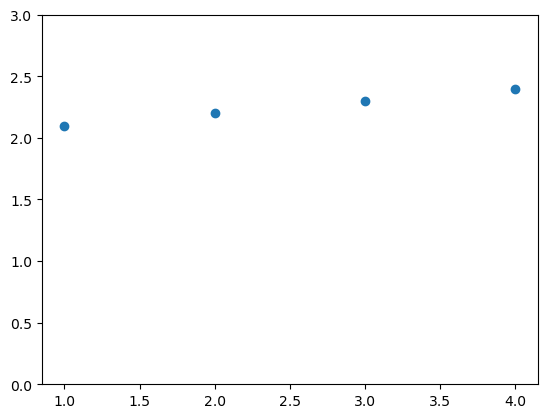

In [3]:
plt.scatter(X[:,1],y)
plt.ylim([0,3])

### Question 1
Plot the Lasso Loss $L(\alpha, w_0, w_1, X, y)$ as a function of the component $w_1$, for $\alpha=0$, $\alpha=1$ and $\alpha=2$. Ignore the bias $b=w_0$ at first, setting it to its true value, so that there is only one parameter to vary, `w[1]`.

What is appearing as you increase $\alpha$ (besides the trivial upward shift of the curve due to adding a large regularization)?

Where is the minimum of the loss ?

In [4]:
w = np.array([2, 0.1])
alpha=0.1
1/N*np.sum((X@w-y)**2) + alpha*np.sum(np.abs(w))

0.21000000000000002

In [5]:
def LossLasso(w,X,T,alpha):
    return  1/N*np.sum((X@w-y)**2) + alpha*np.sum(np.abs(w))
    

In [6]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

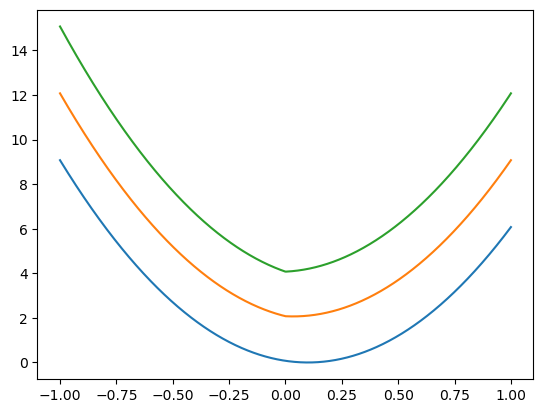

In [7]:
alpha=0
ws = np.linspace(-1,1,1001)
Ls = []
b=2
for w1 in ws:
    w = np.array([b,w1])
    Ls.append( LossLasso(w,X,y,alpha) )
plt.plot(ws, Ls) #, marker='+')

alpha=1
ws = np.linspace(-1,1,1000)
Ls = []
b=2
for w1 in ws:
    w = np.array([b,w1])
    Ls.append( LossLasso(w,X,y,alpha) )
plt.plot(ws, Ls) #, marker='+')


alpha=2
ws = np.linspace(-1,1,1000)
Ls = []
b=2
for w1 in ws:
    w = np.array([b,w1])
    Ls.append( LossLasso(w,X,y,alpha) )
plt.plot(ws, Ls) #, marker='+')

## Answers:  
- the cusp is more and more pronounced as we increase $\alpha$
- the minimum of the loss, for large enough alpha, is at the cusp, i.e. for `w[1]=0` exactly: we have killed one parameter (set it to 0 exactly).

### Question 2
Plot also the Ridge Loss for $\lambda=1$ and $\lambda=0.01$. Ignore the bias at first, setting it to its true value.

Do you see the same thing appearing ? (besides the trivial upward shift of the curve due to adding a large regularization)

Where is the minimum of the loss ? (answer with words)

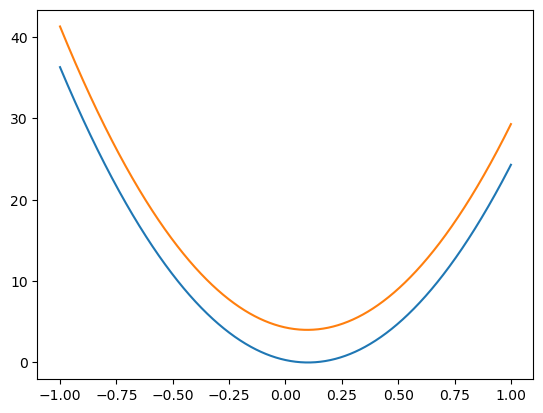

In [8]:
def LossRidge(w,X,T,alpha):
    return  np.sum((X@w-y)**2) + alpha*np.sum(np.abs(w)**2)
alpha=0
ws = np.linspace(-1,1,1000)
Ls = []
b=2
for w1 in ws:
    w = np.array([b,w1])
    Ls.append( LossRidge(w,X,y,alpha) )
plt.plot(ws, Ls) #, marker='+')

alpha=1
ws = np.linspace(-1,1,1000)
Ls = []
b=2
for w1 in ws:
    w = np.array([b,w1])
    Ls.append( LossRidge(w,X,y,alpha) )
plt.plot(ws, Ls) #, marker='+')

## Answers:  
- there is no cuspo appearing
- the minimum of the loss, becomes closer to 0 as we increase alpha, but it never becomes exactly 0

### Question 3
Learn the Lasso model, using the method  `sklearn.linear_model.Lasso`, and compare the results using alpha=1 or alpha=0.01.

In [9]:
#?sklearn.linear_model.Lasso

In [10]:
alpha=0.01
lasso1 = sklearn.linear_model.Lasso(alpha=alpha)

In [11]:
lasso1.fit(X,y)

Lasso(alpha=0.01)

In [12]:
prediction = lasso1.predict(X)

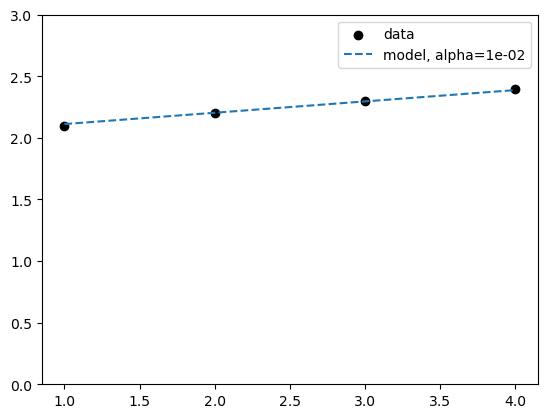

In [13]:
plt.scatter(X[:,1],y, label="data", c='k')
plt.plot(X[:,1], prediction, ls="--", label="model, alpha=%.e"%alpha)
plt.ylim([0,3])
plt.legend()

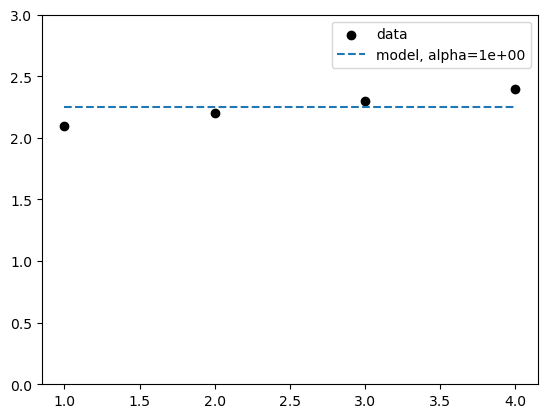

In [14]:
alpha=1
lasso1 = sklearn.linear_model.Lasso(alpha=alpha)
lasso1.fit(X,y)
prediction = lasso1.predict(X)
plt.scatter(X[:,1],y, label="data", c='k')
plt.plot(X[:,1], prediction, ls="--", label="model, alpha=%.e"%alpha)
plt.ylim([0,3])
plt.legend()

### Note: 
We have augmented the data with the "trick of the ones", but it wasn't needed, because `lasso1.fit_intercept= True` , so we have two bias !
But the lasso method of sklearn does not apply the L1 regul to the bias :)
We could also not augment the data (and reshape it, then), or just use `lasso1.fit_intercept=False` with the augmented X... but what happens then ?

In [15]:
lasso1.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## Answer: 
- comparison of alpha=0.1 and alpha=1: in the second case our model has `w[1]=0` i.e. the slope of the model is 0.
- usually one does not apply the L1 Loss to the bias, because it has good reasons to be non-zero in general (there is only one bias per linear model). If we  use `lasso1.fit_intercept=False` with the augmented X, we will have a bias in the model, but it will be L1-regularized, and our predictions will be off.

### Question 4:
What is the limit alpha value for which we get a 0 slope (in our model) ?  You can simply try many values of alpha (use a loop !) and answer with an interval (you can narrow the interval by decimation if you like)

In [16]:
alphaRange = np.logspace(-1,0,20)
alphaRange

array([0.1       , 0.11288379, 0.1274275 , 0.14384499, 0.16237767,
       0.18329807, 0.20691381, 0.23357215, 0.26366509, 0.29763514,
       0.33598183, 0.37926902, 0.42813324, 0.48329302, 0.54555948,
       0.61584821, 0.6951928 , 0.78475997, 0.88586679, 1.        ])

0.1 [0.   0.02] 2.2
0.11288378916846889 [0.         0.00969297] 2.225767578336938
0.12742749857031338 [0. 0.] 2.25
0.14384498882876628 [0. 0.] 2.25
0.16237767391887217 [0. 0.] 2.25
0.18329807108324356 [0. 0.] 2.25
0.20691380811147897 [0. 0.] 2.25
0.23357214690901226 [0. 0.] 2.25
0.26366508987303583 [0. 0.] 2.25
0.29763514416313175 [0. 0.] 2.25
0.33598182862837817 [0. 0.] 2.25
0.37926901907322497 [0. 0.] 2.25
0.42813323987193935 [0. 0.] 2.25
0.4832930238571752 [0. 0.] 2.25
0.5455594781168519 [0. 0.] 2.25
0.6158482110660264 [0. 0.] 2.25
0.6951927961775606 [0. 0.] 2.25
0.7847599703514611 [0. 0.] 2.25
0.8858667904100825 [0. 0.] 2.25
1.0 [0. 0.] 2.25


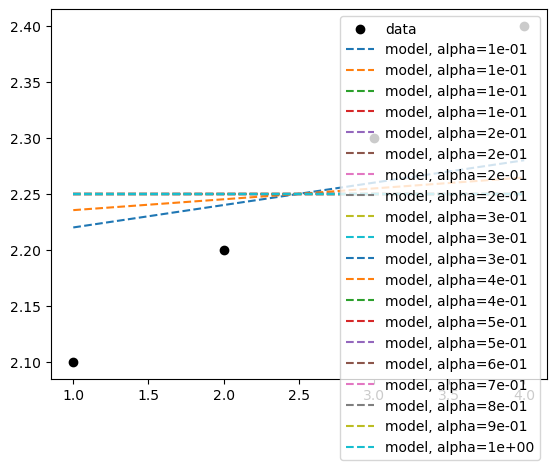

In [17]:
alphaRange = np.logspace(-1,0,20)
plt.scatter(X[:,1],y, label="data", c='k')
for alpha in alphaRange:
    lasso1.set_params(alpha=alpha)
    lasso1.fit(X,y)
    print(alpha, lasso1.coef_, lasso1.intercept_)
    plt.plot(X[:,1], X@ lasso1.coef_+ lasso1.intercept_, ls="--", label="model, alpha=%.e"%alpha)

# plt.ylim([0,3])
plt.legend()

### Question 5:
Code your own Lasso algorithm, using numpy (first, do the exercise on the Laplace prior) -- you may need sub-gradients.

-> next TP !